In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

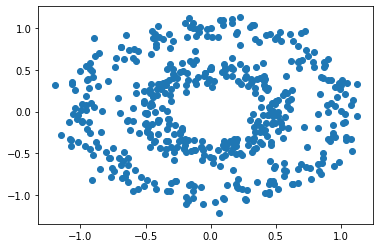

In [2]:
n  = 500
p = 2

X, Y = make_circles(n_samples=n, factor=0.5, noise=0.09)

Y = Y[:, np.newaxis]

plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [3]:
Y.shape

(500, 1)

In [4]:
X.shape

(500, 2)

In [5]:
class capa_neuronal():
    def __init__(self, entradaN, salidaN, activacion):
        self.activacion = activacion
        self.arranque = np.random.rand(1, salidaN) * 2 -1
        """
        genera numero random de 0 a 1, 
        mult por 2 para que fluctue de 0 a 2, y
        resta uno para que fluctue de -1 a 1
        """
        self.peso = np.random.rand(entradaN, salidaN) * 2 -1
    


Funcion sigmoidal

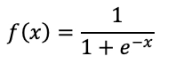

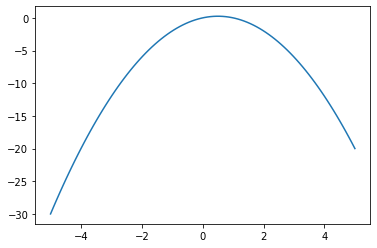

In [6]:
sigmoide = lambda x: 1 /(1 + np.e ** (-x)), lambda x: x * (1 - x)# sigmoide , derivada

relu = lambda x: np.maximum(0, x), 


_x = np.linspace(-5, 5, 100)
            
plt.plot(_x, sigmoide[1](_x))


In [7]:
capa0 = capa_neuronal(p, 4, sigmoide)
capa1 = capa_neuronal(4, 8, sigmoide)


def crear_capa(estructura, activacion):
    
    nn = []
    
    for C, capas in enumerate(estructura[:-1]):
    
        nn.append(capa_neuronal(estructura[C], estructura[C+1], activacion))
        
        
    return nn
        


In [8]:
estructura = [p, 4, 8, 1]

red_neuronal = crear_capa(estructura, sigmoide)

coste = (lambda prediccion, real: np.mean((prediccion - real) ** 2), lambda prediccion, real: (prediccion - real))
#calculo del error cuadratico medio y su derivada#

def entrenador(red_neuronal, X, Y, coste, lr=0.5, train=True):
    
    salida = [(None, X)]
    
    for C, capas in enumerate(red_neuronal):
        
    
        ponderada = salida[-1][1] @ red_neuronal[C].peso + red_neuronal[C].arranque
    
        activ = red_neuronal[C].activacion[0](ponderada)
        
        
        salida.append((ponderada, activ))
        
        
        
       
    if train:
        
        deltas = []
        
        for C in reversed(range (0, len(red_neuronal))):
            
            ponderada = salida[C+1][0]#ponderada de la capa anterior, primer valor en bruto de x
            activ = salida[C+1][1]#ponderada de la capa anterior, primer valor de activacion             
            
            if C == len(red_neuronal) - 1: #ultima capa#
                deltas.insert(0, coste[1](activ, Y) * red_neuronal[C].activacion[1](activ)) #error de ultima capa#
            else:
                deltas.insert(0, deltas[0] @ _peso.T * red_neuronal[C].activacion[1](activ)) 
                #error de la capa actual respecto al primer registro de la salida#
                
                
            _peso = red_neuronal[C].peso
            
        
            red_neuronal[C].arranque = red_neuronal[C].arranque - np.mean(deltas[0], axis=0, keepdims=True) * lr
            #Se reajusta el valor de arranque actual restandole la media del primer registro por el learning rate.
            
            
            red_neuronal[C].peso = red_neuronal[C].peso - salida[C][1].T @ deltas[0] * lr
            #se reajusta el valor de peso restandole la el producto matricial de la salida actual y el primer
            #registro de las deltas por el learning rate#
            
    return salida[-1][1]



    print(salida)          
          
            
        
entrenador(red_neuronal, X, Y, coste, 0.5)



array([[0.10236918],
       [0.10292311],
       [0.10231607],
       [0.10182846],
       [0.10219545],
       [0.10236773],
       [0.10177907],
       [0.10360871],
       [0.1018829 ],
       [0.10188056],
       [0.1022632 ],
       [0.10256568],
       [0.10143232],
       [0.1037472 ],
       [0.10297296],
       [0.10301368],
       [0.10327902],
       [0.10310074],
       [0.10167768],
       [0.10171807],
       [0.10307167],
       [0.10302824],
       [0.10236336],
       [0.10349584],
       [0.10261355],
       [0.1017853 ],
       [0.10229438],
       [0.10287605],
       [0.10202261],
       [0.10170001],
       [0.10220628],
       [0.10322066],
       [0.1035253 ],
       [0.10174689],
       [0.1028642 ],
       [0.10260083],
       [0.10280392],
       [0.10320728],
       [0.1038449 ],
       [0.10199941],
       [0.10244442],
       [0.10402183],
       [0.10173634],
       [0.10342816],
       [0.10173623],
       [0.10198344],
       [0.10228301],
       [0.102

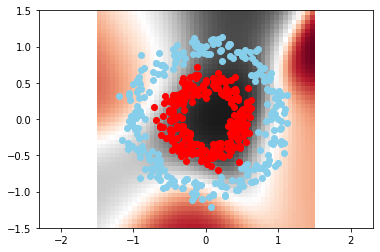

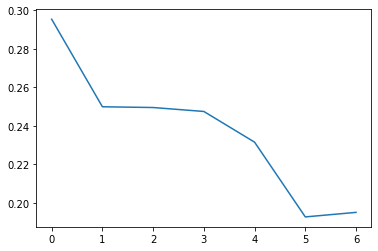

In [ ]:
import time
from IPython.display import clear_output

neural_n = crear_capa(estructura, sigmoide)

#se inicializa la red neuronal y se guarda en variable

loss = []


for l in range(3000):#ciclos de entrenamiento
        
        pY = entrenador(neural_n, X, Y, coste, lr=0.1)#el learning rate el tamaño de la variacion en los valores
                                                        #random del muestreo, donde 1 es igual a variacion 0
                                                            #a manor lr mayor tacto en el muestreo
        
        if l % 25 == 0:#
            
            loss.append(coste[0](pY, Y))
            
            res = 50
            
            _x0 = np.linspace(-1.5, 1.5, res)
            _x1 = np.linspace(-1.5, 1.5, res)
            
            
            _Y = np.zeros((res, res))
            
            for l0, x0 in enumerate (_x0):
                for l1, x1 in enumerate(_x1):
                    _Y[l0, l1] = entrenador(neural_n, np.array([[x0, x1]]), Y, coste, train=False)[0][0]
                    
                    
            plt.pcolormesh(_x0, _x1, _Y, cmap="RdGy")
            plt.axis("equal")
            
            plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="skyblue")
            plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="red")
            
            clear_output(wait=True)
            plt.show()
            plt.plot(range(len(loss)), loss)
            plt.show()
            time.sleep(0.3)
            print(loss)
            print(len(loss))
            